**Importing Librairies**

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Load the dataset
# The dataset has an extra header row, so we use skiprows=1
df = pd.read_csv("high-school-directory.csv", skiprows=1)

# Function to clean column names
def clean_column_name(column_name):
    # Lowercase the name
    column_name = column_name.lower()
    # Replace spaces with underscores
    column_name = column_name.replace(' ', '_')
    # Remove special characters
    column_name = re.sub(r'[^a-z0-9_]', '', column_name)
    return column_name

# Clean the column names
df.columns = [clean_column_name(col) for col in df.columns]

# Filter the dataset to include only schools located in Brooklyn
brooklyn_schools = df[df['borough'] == 'Brooklyn']

# Display the first few rows and the count of the filtered DataFrame
print(brooklyn_schools.head())
print(f"\nNumber of schools in Brooklyn: {brooklyn_schools.shape[0]}")

       dbn                                        school_name   borough  \
1   21K559        Life Academy High School for Film and Music  Brooklyn   
2   16K393     Frederick Douglass Academy IV Secondary School  Brooklyn   
7   17K122  Pathways in Technology Early College High Scho...  Brooklyn   
10  23K644                     Eagle Academy for Young Men II  Brooklyn   
12  15K462                           Secondary School for Law  Brooklyn   

   building_code  phone_number    fax_number  grade_span_min  grade_span_max  \
1           K400  718-333-7750  718-333-7775             9.0              12   
2           K026  718-574-2820  718-574-2821             9.0              12   
7           K625  718-221-1593  718-221-1781             9.0              12   
10          K271  718-495-0863  718-732-2129             6.0              12   
12          K460  718-832-4250  718-499-3947             9.0              12   

    expgrade_span_min  expgrade_span_max  ... council_district censu

In [9]:
total_brooklyn_schools = brooklyn_schools['dbn'].nunique()
print(f"Total unique schools in Brooklyn: {total_brooklyn_schools}")


Total unique schools in Brooklyn: 121


In [10]:
# Filter for schools where the minimum grade is 9
grade_9_schools = brooklyn_schools[
    (brooklyn_schools['grade_span_min'] <= 9) &
    (brooklyn_schools['grade_span_max'] >= 9)
]['dbn'].nunique()

print(f"Unique schools in Brooklyn that include Grade 9: {grade_9_schools}")



Unique schools in Brooklyn that include Grade 9: 121


#** --- Group and summarize ---**

In [11]:
schools_per_borough = df.groupby('borough')['dbn'].nunique()
print("\nUnique schools per borough (using nunique):")
print(schools_per_borough)


Unique schools per borough (using nunique):
borough
Bronx            118
Brooklyn         121
Manhattan        106
Queens            80
Staten Island     10
Name: dbn, dtype: int64


**Average number of students per borough**

In [27]:
avg_students = df.groupby('borough')['total_students'].mean().round(1)
print("\nAverage number of students per borough:")
print(avg_students)


Average number of students per borough:
borough
Bronx             490.4
Brooklyn          699.1
Manhattan         589.8
Queens           1046.6
Staten Island    1847.5
Name: total_students, dtype: float64


**Summary of grade_span_max grouped by borough**

In [28]:
grade_span_summary = df.groupby('borough')['grade_span_max'].describe()
print("\nGrade span max summary by borough:")
print(grade_span_summary)


Grade span max summary by borough:
               count       mean       std   min   25%   50%   75%   max
borough                                                                
Bronx          118.0  11.906780  0.369506   9.0  12.0  12.0  12.0  12.0
Brooklyn       121.0  11.933884  0.381566   9.0  12.0  12.0  12.0  12.0
Manhattan      106.0  11.877358  0.472135   9.0  12.0  12.0  12.0  12.0
Queens          80.0  11.825000  0.497462  10.0  12.0  12.0  12.0  12.0
Staten Island   10.0  12.000000  0.000000  12.0  12.0  12.0  12.0  12.0


**Creating Visualizations**


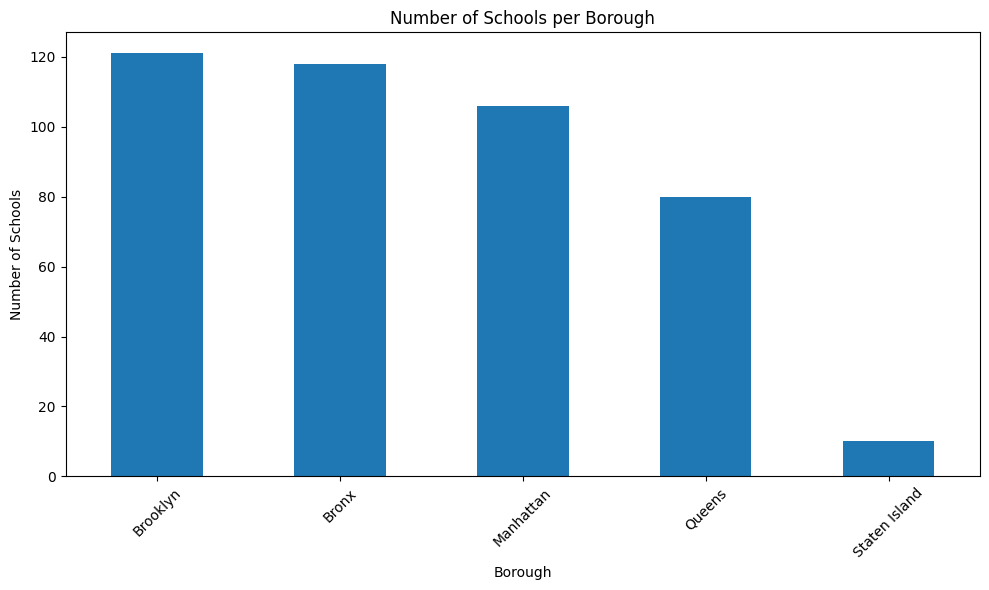

In [29]:
#-Bar chart: Number of schools per borough
schools_per_borough.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Schools per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Schools')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key Insights**

1  -Geographical Distribution: Brooklyn, Bronx, and Manhattan host the highest number of high schools, with 121, 118, and 106 schools respectively, while Staten Island has significantly fewer (10 schools) .

2 -Student Population Averages: While Staten Island has the fewest schools, it has the highest average number of students per school (1847.50), suggesting that its schools are significantly larger on average than those in other boroughs. In contrast, the Bronx has the second-highest number of schools but the lowest average student population (490.41).")